**CASE STUDY: <br> AUTOMATION OF STANDBY DUTY PLANNING FOR RESCUE DRIVERS VIA A
FORECASTING MODEL**

Import necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time, timedelta, date

Import csv file to a dataframe abbreviated as df.

In [3]:
# Define function to read csv file into dataset
def read_csv_file(file): 
    dataset = pd.read_csv(file,header=0)
    return dataset
    
df = read_csv_file(r"C:\Users\nayma\anaconda3\Scripts\case_study\cleaned_data.csv")

# Format the date
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d', errors = 'coerce')

In [4]:
df[df.date.dt.year == 2019].head()

,days,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
1005,1006,2019-01-01,57,8382,1900,90,0,0
1006,1007,2019-01-02,82,9672,1900,90,117,27
1007,1008,2019-01-03,83,7404,1900,90,0,0
1008,1009,2019-01-04,83,9240,1900,90,31,0
1009,1010,2019-01-05,73,7746,1900,90,0,0


Date to format to train regression model

In [6]:
df['date_train'] = df['date'].apply(lambda x: x.toordinal())

It is decided to create the model for an updated n_duty of 2000 for 2019.

In [5]:
df.loc[df.date.dt.year == 2019, 'n_duty']  = 2000

sby_need_2019 = np.array(df[df.date.dt.year == 2019]['sby_need']) - 100
sby_need_2019[sby_need_2019 < 0] = 0
df.loc[df.date.dt.year == 2019, 'sby_need']  = sby_need_2019

dafted_2019 = np.array(df[df.date.dt.year == 2019]['dafted']) - 100
dafted_2019[dafted_2019 < 0] = 0
df.loc[df.date.dt.year == 2019, 'dafted']  = dafted_2019

In [6]:
df[df.date.dt.year == 2019].head()

,days,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,date_train
1005,1006,2019-01-01,57,8382,2000,90,0,0,737060
1006,1007,2019-01-02,82,9672,2000,90,17,0,737061
1007,1008,2019-01-03,83,7404,2000,90,0,0,737062
1008,1009,2019-01-04,83,9240,2000,90,0,0,737063
1009,1010,2019-01-05,73,7746,2000,90,0,0,737064


In [1]:
objective = ((len(df.dafted) - df.dafted.astype(bool).sum(axis=0))/len(df.dafted)).round(2)
objective

NameError: name 'df' is not defined

In [8]:
inactivated = df.n_sby - df.sby_need
inactivated[inactivated < 0] = 0
print("Number of inactivated standby drivers throughout the years: ",np.sum(inactivated), ".")

Number of inactivated standby drivers throughout the years:  84278 .


In [9]:
print("Percentage of inactivated drivers throughout the years: ",round(np.sum(inactivated)/np.sum(df.n_sby), 2), ".")

Percentage of inactivated drivers throughout the years:  0.81 .


Text(0, 0.5, 'Standby activated')

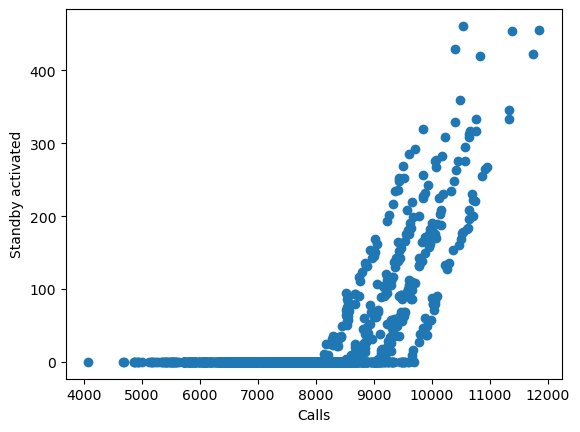

In [10]:
plt.scatter(df['calls'], df['sby_need'])
plt.xlabel('Calls')
plt.ylabel('Standby activated')

In [11]:
df.to_csv(r"C:\Users\nayma\anaconda3\Scripts\case_study\transformed_data.csv", index= False)

Plot per year of correlation between calls and sby_need

1.0
0.99
0.99
1.0


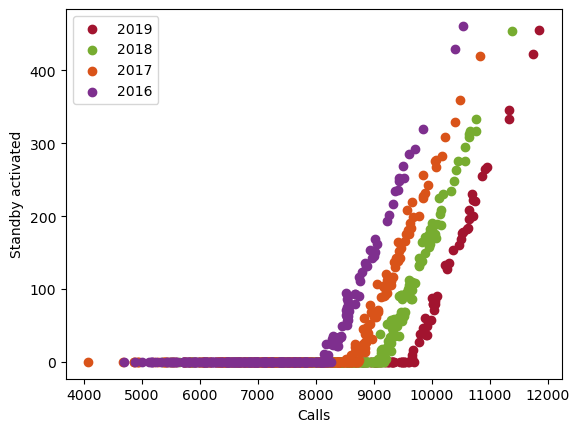

In [8]:
colors = ["#7E2F8E" , "#D95319", "#77AC30", "#A2142F"]
dict_thresh = {2019: 9648, 2018:  9060, 2017:8514, 
 2016: 8136}
for i in [2019, 2018, 2017, 2016]:
    filter = df.date.dt.year == i
    double = (filter) & (df.calls > dict_thresh[i])
    plt.scatter(df[filter]['calls'], df[filter]['sby_need'], color=colors[i-2016])
    print(df[double]['sby_need'].corr(df[double]['calls']).round(2))

plt.xlabel('Calls')
plt.ylabel('Standby activated')
plt.legend(['2019', '2018', '2017', '2016'])

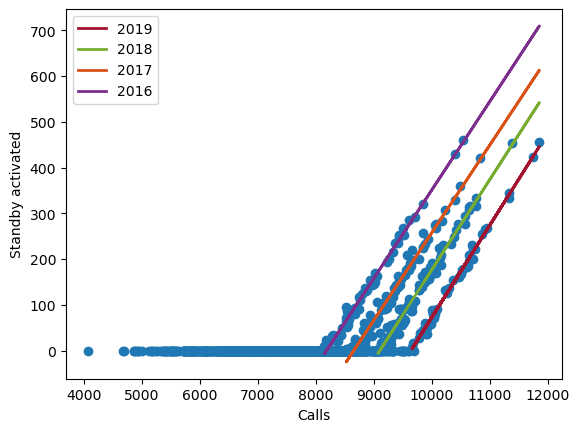

{2019: {'min': 9648, 'm': 0.20123246681605905, 'b': -1938.5467501168534},
 2018: {'min': 9060, 'm': 0.19696741820956948, 'b': -1791.9393396528164},
 2017: {'min': 8514, 'm': 0.19142644367145642, 'b': -1655.5810228548087},
 2016: {'min': 8136, 'm': 0.1931732979337978, 'b': -1579.6676846267887}}

In [13]:
dict_mb = {}

for i in [2019, 2018, 2017, 2016]:
    year_subset = df[(df.date.dt.year == i) & (df.sby_need > 0)]
    min_calls = year_subset['calls'].min()
    filter = df.calls > min_calls
    m, b = np.polyfit(year_subset['calls'], year_subset['sby_need'], 1)
    plt.plot(df[filter]['calls'], b + m * df[filter]['calls'], color=colors[i-2016], linewidth=2)
    dict_mb[i] = {'min': min_calls, 'm': m, 'b': b}
plt.scatter(df['calls'], df['sby_need'])
plt.legend(['2019', '2018', '2017', '2016'])
plt.xlabel('Calls')
plt.ylabel('Standby activated')
plt.show()
dict_mb

In [14]:
len(df[filter]['calls'])

511

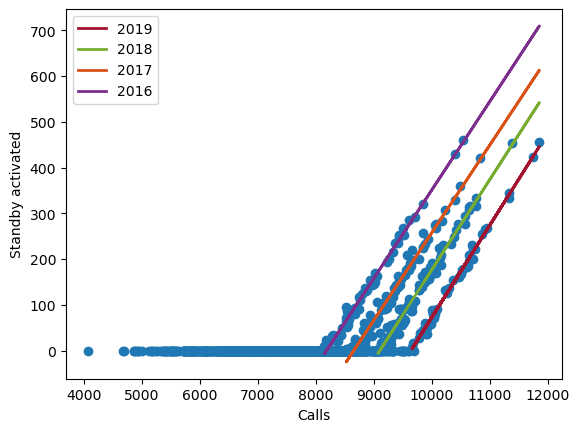

{2019: {'min': 9648, 'm': 0.20123246681605905, 'b': -1938.5467501168534},
 2018: {'min': 9060, 'm': 0.19696741820956948, 'b': -1791.9393396528164},
 2017: {'min': 8514, 'm': 0.19142644367145642, 'b': -1655.5810228548087},
 2016: {'min': 8136, 'm': 0.1931732979337978, 'b': -1579.6676846267887}}

In [15]:
dict_mb = {}

for i in [2019, 2018, 2017, 2016]:
    year_subset = df[(df.date.dt.year == i) & (df.sby_need > 0)]
    min_calls = year_subset['calls'].min()
    filter = df.calls > min_calls
    m, b = np.polyfit(year_subset['calls'], year_subset['sby_need'], 1)
    plt.plot(df[filter]['calls'], b + m * df[filter]['calls'], color=colors[i-2016], linewidth=2)
    dict_mb[i] = {'min': min_calls, 'm': m, 'b': b}
plt.scatter(df['calls'], df['sby_need'])
plt.legend(['2019', '2018', '2017', '2016'])
plt.xlabel('Calls')
plt.ylabel('Standby activated')
plt.show()
dict_mb

Values are of the dictionary {95: 197, 96: 222, 97: 248, 98: 276, 99: 318}


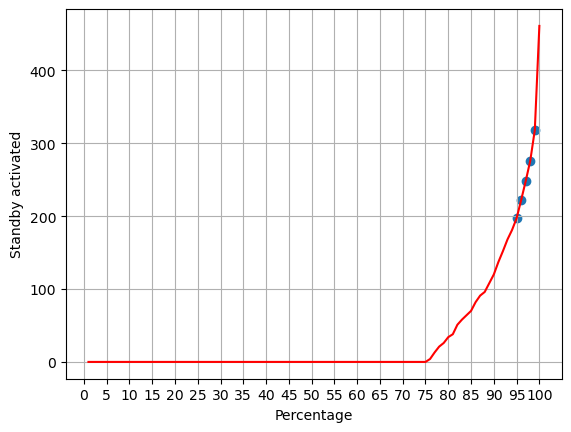

In [16]:
percentile_list = [i for i in range(1, 101)]
sby_need_percentile = []
for i in percentile_list:
    sby_need_percentile += [np.percentile(df.sby_need, i).round()]


threshold = {}
for j in [95, 96, 97, 98, 99]:
    threshold[j] = np.percentile(df.sby_need, j).round().astype(int)

print("Values are of the dictionary", threshold)


plt.scatter(list(threshold.keys()), list(threshold.values()))
plt.plot(percentile_list, sby_need_percentile, 'r-')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Standby activated')
plt.xlabel('Percentage')
plt.grid()
plt.show()